In [202]:
import pandas as pd
import sqlalchemy
from sqlalchemy import create_engine, inspect

engine = create_engine("mysql+pymysql://root@localhost/avocado")
cnx = engine.connect()

In [204]:
import matplotlib.pyplot as plt #genera gràfics a partir de continguts en llistes, vector amb py i amb l'extensió NumPy
import seaborn as sns #llibreria especialitzada en visualització de dades per py desenvolupada amb matplotlib  i ofereix interficie d'alt nivell
#import squarify
import plotly.express as px
import numpy as np
import warnings

In [206]:
inspector = inspect(engine)
nombre_tablas = inspector.get_table_names()

for table in nombre_tablas:
    query = f"select  * from {table}"
    globals ()[f"df_{table}"] = pd.read_sql(query, cnx)

In [208]:
nombre_tablas

['avocado']

In [214]:
#print(nombre_tablas)
nombre_tablas
df_avocado.tail(8)

,MyUnknownColumn,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Descuento
21471,4,2018-02-25,1.57,18421.24,1974.26,2482.65,0.00,13964.33,13698.27,266.06,0.0,organic,2018,WestTexNewMexico,20
21472,5,2018-02-18,1.56,17597.12,1892.05,1928.36,0.00,13776.71,13553.53,223.18,0.0,organic,2018,WestTexNewMexico,20
21473,6,2018-02-11,1.57,15986.17,1924.28,1368.32,0.00,12693.57,12437.35,256.22,0.0,organic,2018,WestTexNewMexico,20
21474,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,20
21475,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,20
21476,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,20
21477,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,20
21478,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico,20


### Porcentaje

In [212]:
df_avocado["Descuento"]=20

In [222]:
df_avocado["Precio_final"] = round(df_avocado["AveragePrice"]*df_avocado["Total Bags"]*(1-(df_avocado["Descuento"]/100)), 2)

In [224]:
df_avocado

,MyUnknownColumn,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Descuento,Precio_final
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,20,9253.47
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,10266.00
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,20,6060.14
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,20,5020.84
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,20,6332.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21474,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,20,17602.27
21475,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,20,12674.30
21476,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,20,14053.59
21477,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,20,16936.97


In [8]:
df_avocado.describe()

,MyUnknownColumn,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,21479.000000,21479.000000,2.147900e+04,2.147900e+04,2.147900e+04,2.147900e+04,2.147900e+04,2.147900e+04,2.147900e+04,21479.000000,21479.000000
mean,24.416453,1.358674,9.435241e+05,3.333944e+05,3.389096e+05,2.680413e+04,2.444141e+05,1.889556e+05,5.249025e+04,2968.277575,2015.994925
std,15.419871,0.394603,3.569556e+06,1.343573e+06,1.286058e+06,1.140717e+05,9.523355e+05,7.275519e+05,2.302533e+05,16679.545984,0.948640
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.060000,1.451056e+04,1.214145e+03,4.028670e+03,0.000000e+00,6.961390e+03,4.436995e+03,1.744950e+02,0.000000,2015.000000
50%,24.000000,1.290000,1.477139e+05,1.533329e+04,4.094472e+04,3.720100e+02,4.805850e+04,3.450189e+04,3.105650e+03,0.000000,2016.000000
75%,38.000000,1.600000,5.117593e+05,1.330664e+05,1.969707e+05,9.916730e+03,1.166761e+05,8.846799e+04,2.309440e+04,167.190000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [25]:
df_avocado.info()
print()
df_avocado.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21479 entries, 0 to 21478
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MyUnknownColumn  21479 non-null  int64  
 1   Date             21479 non-null  object 
 2   AveragePrice     21479 non-null  float64
 3   Total Volume     21479 non-null  float64
 4   4046             21479 non-null  float64
 5   4225             21479 non-null  float64
 6   4770             21479 non-null  float64
 7   Total Bags       21479 non-null  float64
 8   Small Bags       21479 non-null  float64
 9   Large Bags       21479 non-null  float64
 10  XLarge Bags      21479 non-null  float64
 11  type             21479 non-null  object 
 12  year             21479 non-null  int64  
 13  region           21479 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 2.3+ MB



MyUnknownColumn      int64
Date                object
AveragePrice       float64
Total Volume       float64
4046               float64
4225               float64
4770               float64
Total Bags         float64
Small Bags         float64
Large Bags         float64
XLarge Bags        float64
type                object
year                 int64
region              object
dtype: object

In [23]:
df_avocado["Date"].dtype
#df_avocado

dtype('O')

In [27]:
df_avocado

,MyUnknownColumn,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21474,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
21475,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
21476,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
21477,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [88]:
df_avocado["type"].unique()

array(['conventional', 'organic'], dtype=object)

#### Filtre regions

In [81]:
esregio = df_avocado["region"].isin(["Albany", "Atlanta", "Orlando", "Philadelphia"])
df_avocado_new = df_avocado[esregio]

In [31]:
df_avocado.loc[2]

MyUnknownColumn               2
Date                 2015-12-13
AveragePrice               0.93
Total Volume          118220.22
4046                      794.7
4225                  109149.67
4770                      130.5
Total Bags              8145.35
Small Bags              8042.21
Large Bags               103.14
XLarge Bags                 0.0
type               conventional
year                       2015
region                   Albany
Name: 2, dtype: object

In [40]:
df_avocado.iloc[2,3]

118220.22

In [33]:
df_avocado["Large Bags"]

0         93.25
1         97.49
2        103.14
3        133.76
4        197.69
          ...  
21474    431.85
21475    324.80
21476     42.31
21477     50.00
21478     26.01
Name: Large Bags, Length: 21479, dtype: float64

In [86]:
df_avocado["Large Bags"].unique()

array([ 93.25,  97.49, 103.14, ..., 324.8 ,  42.31,  26.01])

#### Gràfica categòrica

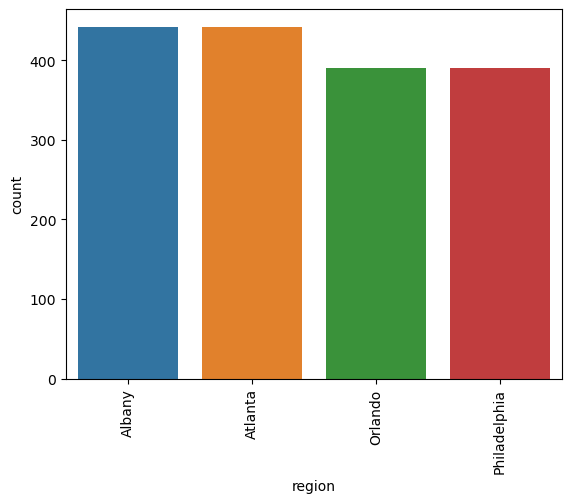

In [83]:
sns.countplot(df_avocado_new, x="region")
plt.xticks(rotation=90)
plt.show()

#### Gràfica numèrica

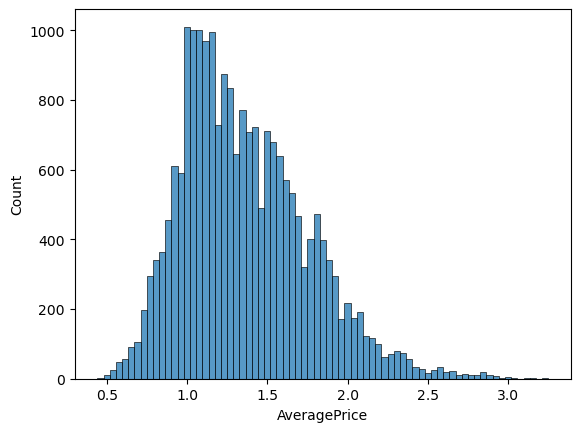

In [49]:
#sns.set_theme(style="darkgrid", context="talk")
sns.histplot(df_avocado, x="AveragePrice")

plt.show()

#### Gràfica dues numèriques

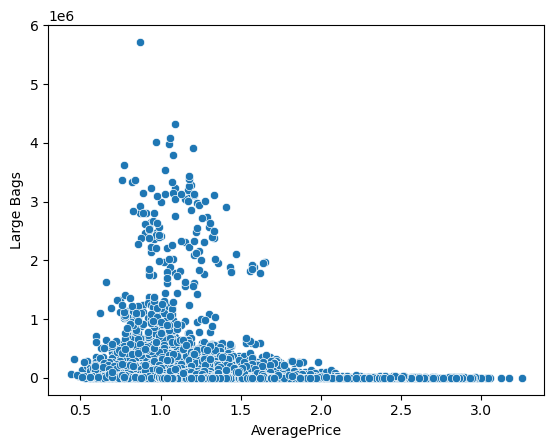

In [63]:
sns.scatterplot(df_avocado, 
                        y="Large Bags",
                        x="AveragePrice",
                       # hue="declined",
                        
                        sizes=(100,500),
                        )
                        # ax=ejes[0])
#sns.lineplot(df_avocado,y="AveragePrice", x="Large Bags" )
plt.show()

#### Dues categòriques

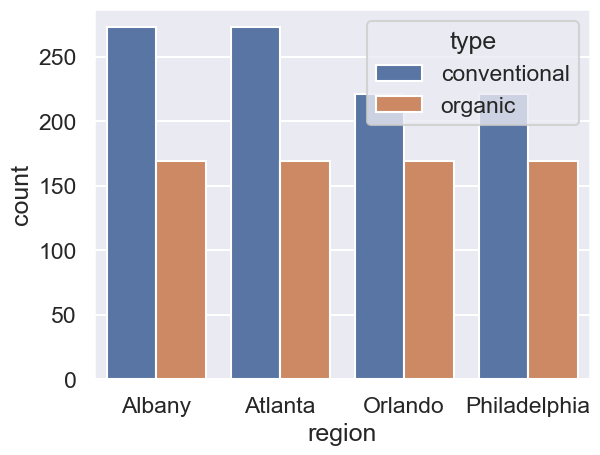

In [166]:
sns.countplot(x=df_avocado_new["region"],
            hue=df_avocado["type"])
            #np.count
            #data=df_avocado)
            #jitter=True)
plt.show()

#### Dues numèriques

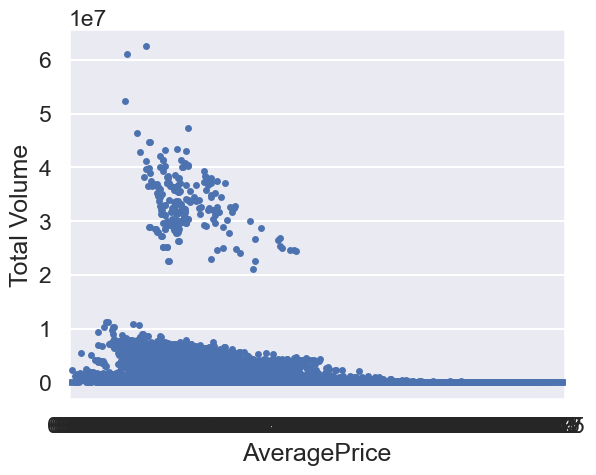

In [161]:
sns.set_theme(style="darkgrid", context="talk")
sns.swarmplot(df_avocado,x="AveragePrice", y="Total Volume")
#plt.title("Diagrama de dispersió de preu i pes")
#plt.ylabel("Preu")
#plt.xlabel("Pes")
plt.show()

#### 1 numèrica i 1 categòrica

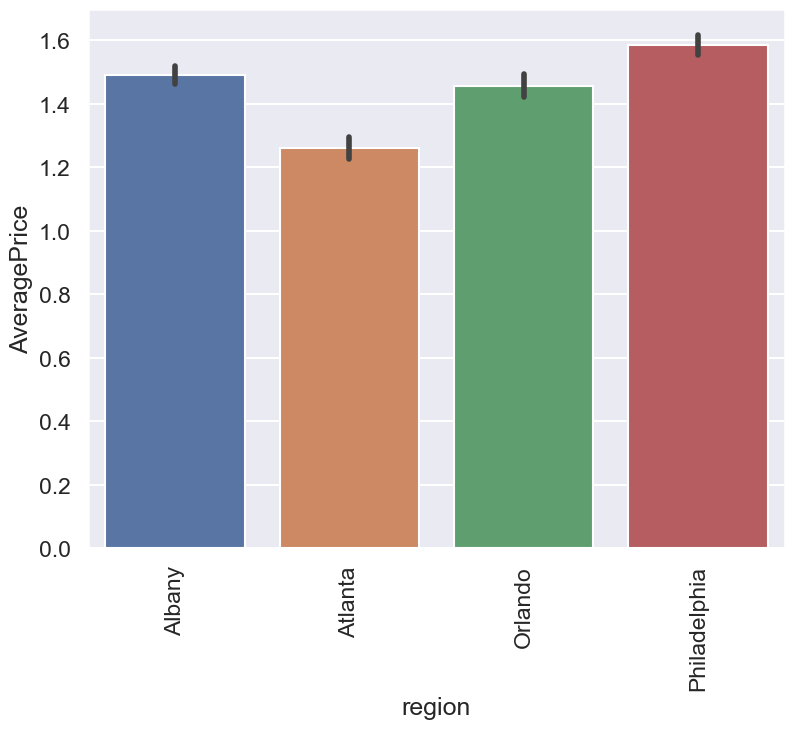

In [170]:
sns.set_theme(style="darkgrid", context="talk")
#fem un merge
#df_companies_transactions = df_companies.merge(df_transactions, how = "inner", left_on="id", right_on="company_id")
plt.figure(figsize=(9,7))
sns.barplot(x=df_avocado_new["region"], y=df_avocado["AveragePrice"])
#plt.title("Gràfic d'estimació d'import per país")
#plt.ylabel("Import")
#plt.xlabel("País")
plt.xticks(rotation=90)
plt.show()

#### 2 categòriques i 1 numèrica

#### Tancar connexió

In [180]:
cnx.close()

In [182]:
cnx.closed

True

In [185]:
engine.dispose()